In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
from qwikidata.sparql import (get_subclasses_of_item,
                              return_sparql_query_results)

In [2]:
# Set the filename of the csv for analysis - same directory
FILENAME = 'open-plaques-london-subjects-2020-06-10.csv'
df = pd.read_csv(FILENAME)

In [3]:
# Quick analysis of the gender proportions
gender = {}
for index, row in df.iterrows():
    try:
        gender[row['sex']] += 1
    except:
        gender[row['sex']] = 1

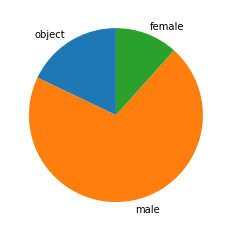

In [4]:
# Display as a pie chart
plt.pie(gender.values(), labels = gender.keys(), startangle = 90)
plt.show()

In [3]:
# Remove the columns which don't have wikidata id's attached
df.dropna(subset = ['wikidata_id'], inplace = True)

In [4]:
# Store the results in a list
results = []
print('Total wikidata examples {0}'.format(df.shape[0]))

# Iterate throught the wiki IDs
for i, row in df.iterrows():
    
    # Waiting will mean more of the queries come back with results
    time.sleep(1)
    
    # P172 represents the ethnicity
    sparql_query = """
    SELECT ?item ?itemLabel 
    WHERE 
    {
      wd:""" + row['wikidata_id'] + """ wdt:P172 ?item.
      SERVICE wikibase:label {bd:serviceParam wikibase:language "en" . }
    }
    """
    
    # Use a try to avoid errors where the property field for cizenship isn't present e.g. objects
    try:
        res = return_sparql_query_results(sparql_query)
        results.append(res['results']['bindings'][0]['itemLabel']['value'])
        print(i, end = ',')
    except:
        continue

Total wikidata examples 2080
3,19,65,73,74,78,90,132,134,199,239,276,279,285,300,316,338,402,414,415,419,426,429,438,449,457,476,505,561,568,617,657,659,667,697,708,711,714,718,726,769,812,820,824,827,828,851,855,861,868,870,880,905,907,919,945,956,962,1005,1045,1059,1072,1091,1092,1100,1104,1122,1137,1142,1148,1205,1207,1208,1224,1245,1282,1297,1299,1302,1305,1306,1307,1326,1335,1339,1350,1351,1354,1363,1405,1428,1446,1457,1458,1470,1474,1476,1478,1496,1507,1541,1592,1595,1609,1610,1642,1656,1705,1707,1711,1725,1734,1749,1750,1768,1800,1859,1869,1873,1882,1886,1909,1928,1939,1946,1952,1965,1997,2008,2015,2034,2045,2078,2086,2094,2095,2105,2135,2141,2164,2165,2176,2191,2229,2246,2256,2275,2278,2283,2303,2308,2312,2351,2360,2366,2387,2391,2417,2428,2435,2445,2448,2451,2462,2468,2482,2490,2491,2515,2528,2552,2553,2561,2572,2590,2605,2612,2644,2646,2675,2677,2681,2686,2717,

In [26]:
len(results)

184

In [6]:
# Condense the list into a frequency dictionary
res_dict = {}
for citizen in results:
    try:
        res_dict[citizen] += 1
    except:
        res_dict[citizen] = 1

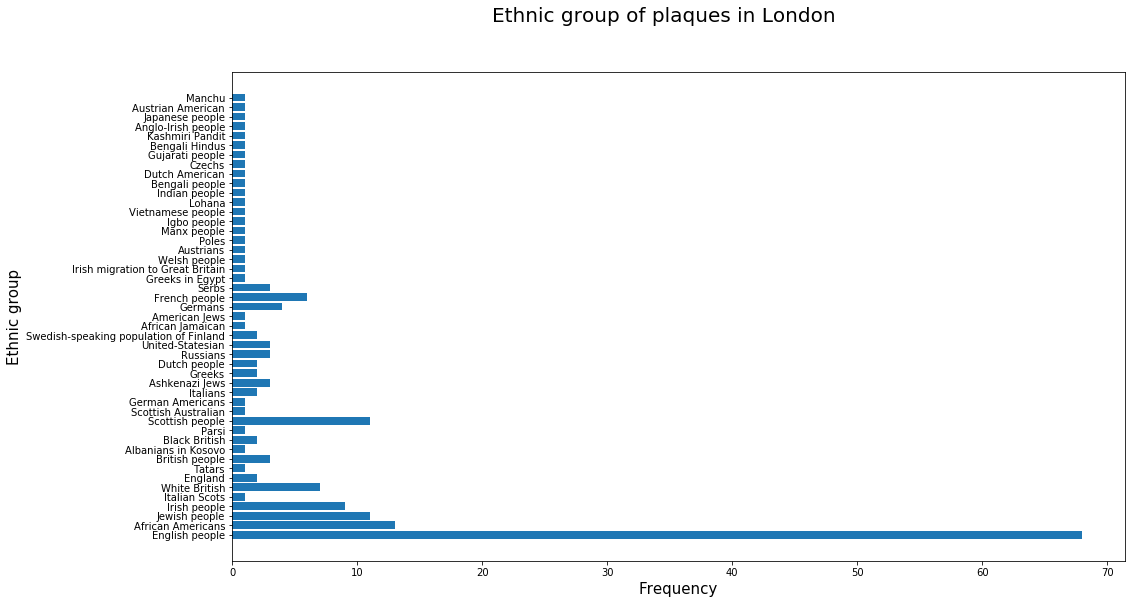

In [25]:
y_pos = list(range(len(res_dict)))
plt.rcParams["figure.figsize"] = (16,9)
fig = plt.figure()
plt.barh(y_pos, res_dict.values())
plt.yticks(y_pos, res_dict.keys())

fig.suptitle('Ethnic group of plaques in London',  fontsize = 20)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Ethnic group',  fontsize = 15)

plt.show()
fig.savefig('Ethnic group horizontal bar chart')